On commence par importer les librairies nécessaires

In [203]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pulp

#### 1. Partie Commune


Génerer les noeuds et l'ensemble des arcs aléatoirement

In [204]:
N= np.random.randint(20, 100)
A= np.random.randint(50, 100)

Génerer les noeuds et l'ensemble des arcs aléatoirement

In [205]:
G=nx.gnm_random_graph(N,A,directed=True)

Identifier les boucles et les supprimer

In [206]:
boucles=list(nx.selfloop_edges(G))
G.remove_edges_from(boucles)

Afficher le graphe

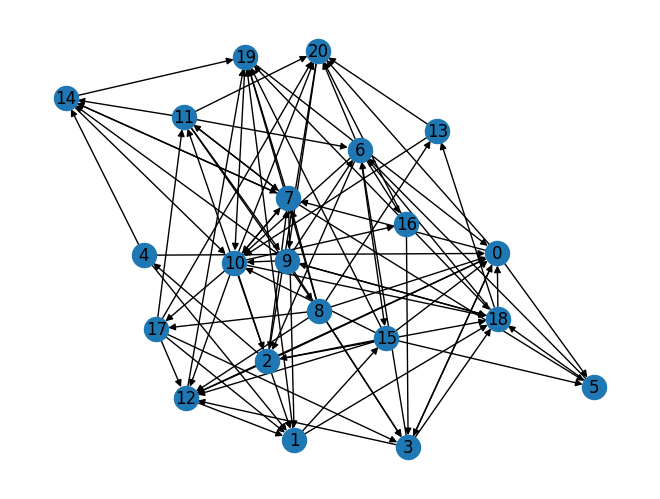

In [207]:
nx.draw_spring(G,with_labels=True)
plt.show()

Vérifier si le nombre de noeuds et le nombre d'arcs générés sont corrects.

In [208]:
print("Le nombre de noeuds initialisé est", N, "et le nombre de noeuds du graphe est:", G.number_of_nodes())
print("Le nombre d'arcs initialisé est", A, "et le nombre d'arcs du graphe est:", G.number_of_edges())

Le nombre de noeuds initialisé est 21 et le nombre de noeuds du graphe est: 21
Le nombre d'arcs initialisé est 90 et le nombre d'arcs du graphe est: 90


Définir U et C et affecter les coûts et les capacités aléatoirement sur les arcs dans les intervalles [0,C] et [0,U] respectivement

In [209]:
U,C=20,50
for i, j in G.edges():
    G[i][j]['u'] = np.random.randint(0, U)
    G[i][j]['c'] = np.random.randint(0, C)

# Print the capacities and costs of each edge
for i, j in G.edges():
    print(f"({i}, {j}): U = {G[i][j]['u']}, C = {G[i][j]['c']}")

(0, 7): U = 16, C = 29
(0, 3): U = 3, C = 49
(0, 5): U = 9, C = 2
(0, 20): U = 7, C = 11
(1, 15): U = 13, C = 4
(1, 18): U = 9, C = 19
(1, 19): U = 3, C = 23
(2, 1): U = 7, C = 29
(2, 4): U = 9, C = 7
(2, 12): U = 18, C = 15
(2, 11): U = 4, C = 46
(2, 0): U = 18, C = 30
(2, 18): U = 9, C = 27
(2, 7): U = 6, C = 10
(3, 0): U = 7, C = 30
(3, 18): U = 5, C = 16
(3, 6): U = 17, C = 26
(3, 12): U = 19, C = 46
(4, 0): U = 0, C = 29
(4, 14): U = 2, C = 14
(4, 1): U = 17, C = 7
(5, 6): U = 19, C = 16
(5, 18): U = 4, C = 36
(6, 16): U = 11, C = 34
(6, 15): U = 5, C = 19
(6, 20): U = 10, C = 24
(6, 2): U = 18, C = 49
(6, 10): U = 7, C = 24
(7, 14): U = 11, C = 9
(7, 5): U = 3, C = 22
(7, 1): U = 5, C = 29
(7, 10): U = 3, C = 34
(7, 11): U = 9, C = 25
(7, 19): U = 6, C = 17
(8, 17): U = 6, C = 11
(8, 3): U = 18, C = 40
(8, 0): U = 8, C = 18
(8, 13): U = 0, C = 7
(8, 7): U = 5, C = 23
(8, 19): U = 15, C = 41
(8, 12): U = 13, C = 40
(9, 6): U = 9, C = 31
(9, 14): U = 9, C = 11
(9, 3): U = 6, C = 4


#### 3. Problème de flot à coût minimum avec capacité


1. Définir un ensemble de sources S ⊆ N et un ensemble de destinations T ⊆ N

In [210]:
S = set(np.random.sample(5))
D = set(np.random.sample(9))

Vérifier qu'ils sont disjoints

In [211]:
while len(S.intersection(D)) > 0:
    T = set(np.random.sample(8))

Afficher S et T

In [212]:
print("Sources:", S)
print("Destinations:", D)

Sources: {0.14518390201771225, 0.8798661848697955, 0.5183733151013328, 0.2762391938386488, 0.8519542662299391}
Destinations: {0.8165663169489804, 0.9159572906825152, 0.5579232506426185, 0.9118165727718741, 0.1560464985367318, 0.8156836986388346, 0.8512547718570723, 0.31053566466675697, 0.6903076245352636}


2. affecter des valeurs d’offre de trafic sur les noeuds sources dans l’intervalle $[0,\overline{\rm ds}]$


In [213]:
ds_barre=1000
for s in S:
        G.nodes[s]['traffic_offer']=np.random.uniform(0,ds_barre)

KeyError: 0.14518390201771225

3. affectez des valeurs de demande de trafic sur les noeuds destinations dans l’intervalle $[0,\overline{\rm dt}]$

In [ ]:
dt_barre = 500
for node in D:
    G.nodes[node]['traffic_demand'] = np.random.uniform(0, dt_barre)

KeyError: 0.7333443796903089